# Анализ и предсказание оттока клиентов фитнес-центров "К"

## Библиотеки

In [1]:
# Обработка и анализ данных.
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Обучение модели с учителем.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Обучение модели без учителя.
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
import itertools

### EDA (исследователький анализ данных)

In [2]:
gym_churn = pd.read_csv(r'D:\Analysis\repository_prakticum\gym_churn.csv')

#### Первый взгляд на данные

In [3]:
# Определим объем данных.
print(f' Датасет содержит {gym_churn.shape[1]} столбцов и {gym_churn.shape[0]} строк.')

 Датасет содержит 14 столбцов и 4000 строк.


In [4]:
# Выведем первые 5 строк.
gym_churn.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


*Комментарий.* Все данные представлены в числовом формате (далее подтвердим (или опровергнем) это, вызвав метод info()). В таблице половина (7) столбцов может быть отнесена к категориальным данным, представленным в бинарном виде (0,1). Ограниченное число значений также имеют еще 2 столбца.

In [5]:
# Тип представленных данных.
gym_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

*Комментарий.* Данные действительно представлены в числовом формате (int, float). Пропуски отсуствуют.

In [6]:
# Проверим данные на наличие явных дубликатов.
print(f'Количество дубликатов - {gym_churn.duplicated().sum()}.')

Количество дубликатов - 0.


In [7]:
# Изучим основные статистики.
gym_churn.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


*Комментарий.*
- Примерно поровну разделились ответы (в анкетах) в столбцах gender и Partner.
- Значения близки к среднему в столбцах: Near_location, Phone, Age.
- Значительное разнообразие в значениях характерно для остальных столбцов.

Так как для большинства характеристик разброс в значениях большой, это позволит в дальнейшем разделить клиентов на группы (кластеры).

#### Среднее значение параметров среди ушедших и оставшихся

In [8]:
gym_churn.groupby('Churn').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


*Комментарий.* По средним значениям параметров в группе оставшихся и ушедших можно сделать первые предположения:
- Среди оставшихсяи ушедших в среднем одинаково характеризуются следующие параметры: gender, Near_location, Phone, с небольшой натяжкой Age, - эти параметры не являются ключевыми при оценке оттока.
- Оставшихся в среднем можно охарактировать так: обладатели полугодового абонемента, в среднем посещающие клуб 2 раза в неделю уже более 4 (почти 5) месяцев. Они тратят больше ушедших на доп.услуги, чаще посещают групповые занятия, чаще их приводят друзья, чуть больше половины из них - сотрудники компании-партнера клуба.
- Среди ушедших в среднем больше тех, кто не живет рядом с клубом, не ходит с другом и не посещает групповые занятия. В среднем занимаются 1 раз в неделю и не покупают "длинный" абонемент, "новенькие".

#### Распределения параметров среди ушедших и оставшихся

Построим гистрограммы частот признаков с разбиением на группы:
- клиенты, сформировавшие отток;
- оставшиеся.

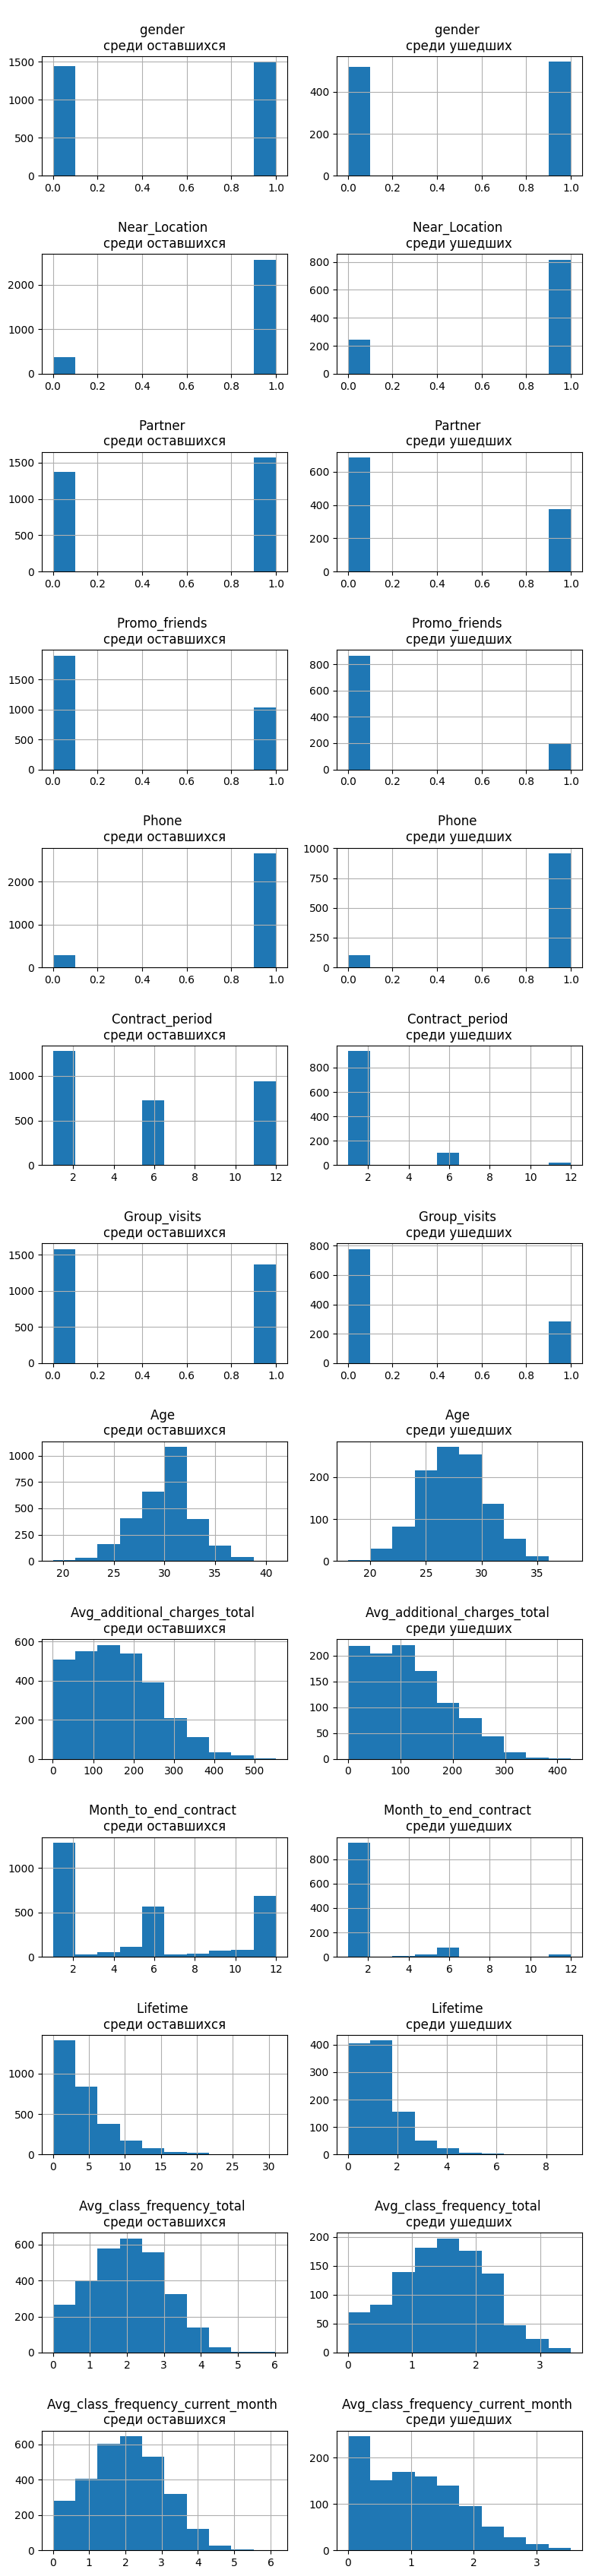

In [9]:
fig, axes = plt.subplots(ncols=2, nrows=len(gym_churn.drop('Churn', axis=1).columns), figsize=(8, 34))

for i, col in enumerate(gym_churn.drop('Churn', axis=1).columns):
    gym_churn.query('Churn == 0')[col].hist(ax=axes[i][0])
    axes[i][0].set_title(f'\n{col} \nсреди оставшихся')
    
    gym_churn.query('Churn == 1')[col].hist(ax=axes[i][1])
    axes[i][1].set_title(f'\n{col} \nсреди ушедших')
    
plt.tight_layout();

*Комментарий.* 
- Для бинарных параметров (+Contract_period с тремя значениями) гистограммы отражают средние значения, которые оценили на предыдущем шаге.
- Среди оставшихся наиболее многочислена группа клиентов в возрасте 30-32 лет, когда среди ушедших возрастной дипазон шире и "моложе" 23-30 лет.
- Lifetime почти для всех ушедших клиентов был меньше 4 месяцев.
- Средние траты на доп. услуги среди клиентов распределены не "нормально".
- Возраст, частота посещений имеют близкое к нормальному распределение. Частота посещений среди ушедших в предыдущий месяц  около 0,25 раз в неделю. Такой выброс как раз описывает, что чаще всего клиенты уходят резко и не возвращаются в следующем месяце.

#### Матрица корреляций

Посмотрим, насколько сильно параметры зависят друг от друга:
- Вычислим матрицу корреляций.
- Отобразим результат в виде тепловой карты.

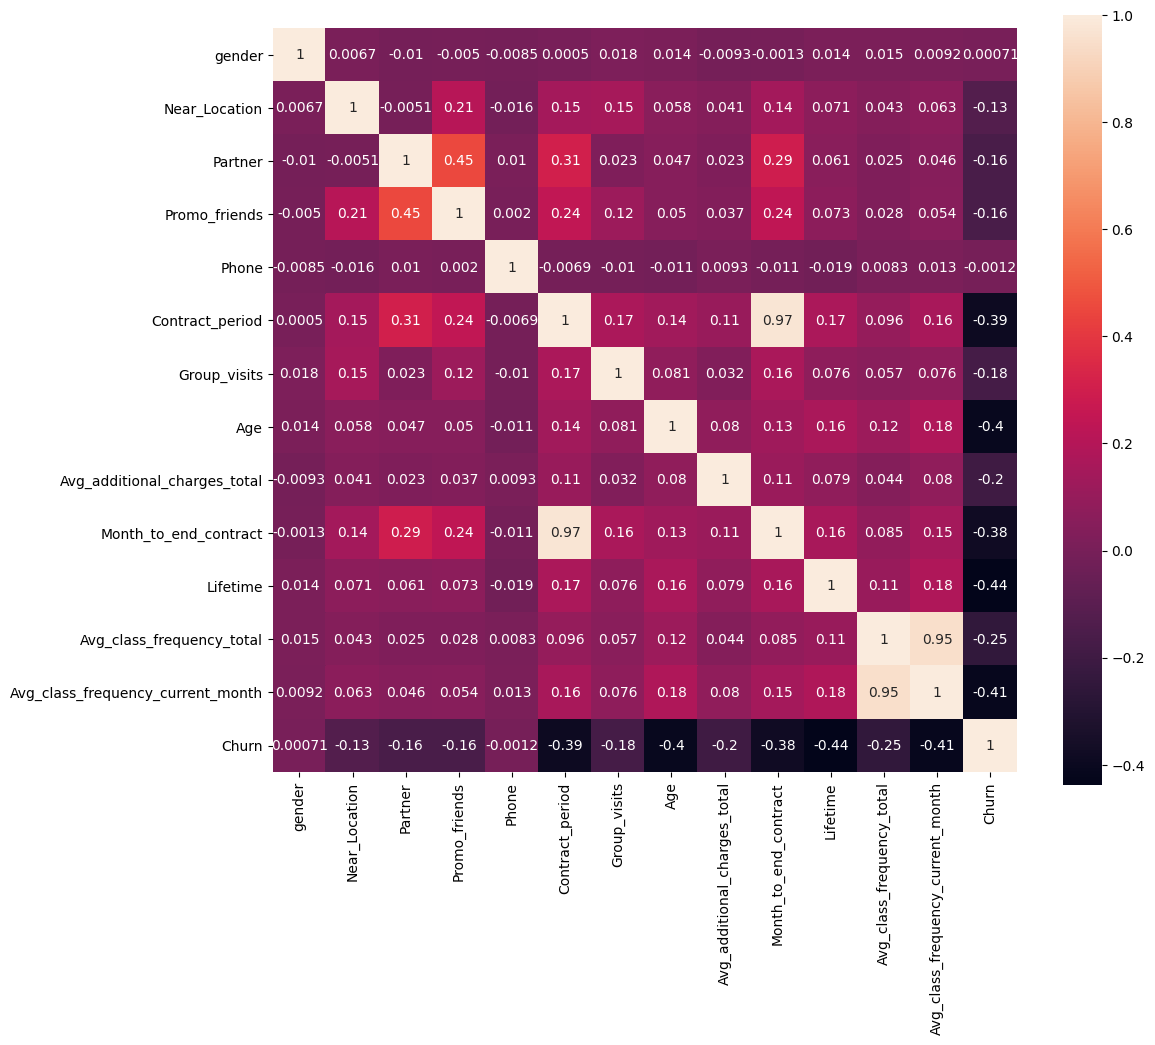

In [10]:
cm = gym_churn.corr()

plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True, square=True);

*Комментарий.* 
- Выделяются пары параметров, корреляция которых близка к единице: 0,95 для среднего посещения в целом и в предыдущий месяц; 0,95 для периода абонемента и оставшихся до его конца месяцев. Такая корреляция понятна на интуитивном уровне, поскольку эти параметры в целом отражают одну характеристику с разных сторон.
- Прослеживается средняя корреляция между клиентами - сотрудниками компании-партнера и теми, кого привел друг.
- С оттоком все параметры (кроме пола) имеют отрицательную корреляцию. Минимальная составляет -0,44 с лайфтаймом. Так же со значением около -0,40 коррелируют частота посещений в предыдущий месяц, возраст, период абонемента и время до его окончания. Можно предположить, что от этих параметров и будет в первую очередь зависеть отток клиентов.

#### Вывод

1) Для анализа представлены в полном объеме данные 4000 клиентов, оценка возможна по 13 параметрам. По первым оценкам среднего и стандартного отклонения: примерно поровну разделились ответы (в анкетах) в столбцах gender и Partner; значения близки к среднему в столбцах: Near_location, Phone, Age; значительное разнообразие в значениях характерно для остальных столбцов.

2) *По средним значениям параметров* в группе оставшихся и ушедших можно сделать первые предположения:
- Среди оставшихся и ушедших в среднем одинаково характеризуются следующие параметры: gender, Near_location, Phone, с небольшой натяжкой Age, - эти параметры не являются ключевыми при оценке оттока.
- ***Оставшихся в среднем можно охарактировать так***: обладатели полугодового абонемента, в среднем посещающие клуб 2 раза в неделю уже более 4 (почти 5) месяцев. Они тратят больше на доп.услуги, чем ушедшие, чаще посещают групповые занятия, чаще их приводят друзья, чуть больше половины из них - сотрудники компании-партнера клуба. Возраст 30-32 года.
- ***Среди ушедших в среднем*** больше тех, кто не живет рядом с клубом, не ходит с другом и не посещает групповые занятия. В среднем занимаются 1 раз в неделю и не покупают "длинный" абонемент, "новенькие" (лайфтайм <4 мес.). Возраст 23-30 лет.

3) Средние траты на доп. услуги среди клиентов распределены не "нормально". Возраст, частота посещений имеют близкое к нормальному распределение. Частота посещений среди ушедших в предыдущий месяц около 0,25 раз в неделю. Такой выброс как раз описывает, что чаще всего клиенты уходят резко и не возвращаются в следующем месяце.

4) *Корреляция параметров.*
- Коррелируют между собой 2 пары парметров: период абонемента и оставшиеся до его конца месяцы, среднее посещение в целом и в предыдущий месяц. Прослеживается средняя корреляция между клиентами - сотрудниками компании-партнера и теми, кого привел друг.
- С оттоком все параметры (кроме пола) имеют отрицательную корреляцию. Наибольшее влияние оказывает лайфтайм (-0,44). Так же со значением около -0,40 коррелируют частота посещений в предыдущий месяц, возраст, период абонемента и время до его окончания. Предположительно, от этих параметров и будет в первую очередь зависеть отток клиентов.


***На основе проведенных исследований можно предположить, что среди приведенных параметров влияние на отток оказывают период абонемента и частота посещений клуба, лайфтайм и возраст клиентов. Наименьшее или не оказывают вовсе - пол, расположение клуба, траты на доп.услуги и др.***

### Модель прогнозирования оттока клиентов

Нас интерсует попадет клиент в отток или останется - это бинарная задача. Для ее решения рассмотрим две модели: логистическую регрессию (хорошо работает для бинарной классификации) и случайных лес (точная и устойчивая к переобучению модель, способная улавливать сложные зависимости между данными). 

#### Обучающая и валидационная выборки

- Разделим данные на признаки (матрица X) и целевую переменную (y).
- Выделим обучающую и валидационную выборки в соотношении 80:20.
- Стандартизируем выборки.

In [11]:
X = gym_churn.drop(columns=['Churn'])
y = gym_churn['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

scaler = StandardScaler()
scaler.fit(X_train) 
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

*Комментарий.* Данные подготовлены: для обучения модели выделено 80 % данных, для валидации качества модели, соответственно, 20 %; данные стандартизированы.

#### Обучение модели

Зададим алгоритмы и обучим модели логистической регрессии и случайного леса.

In [12]:
lr_model = LogisticRegression(random_state=0)
lr_model.fit(X_train_st, y_train)

LogisticRegression(random_state=0)

In [13]:
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)
rf_model.fit(X_train_st, y_train)

RandomForestClassifier(random_state=0)

*Комментарий.* Модели логистической регрессии и случайного леса обучены. Проверим качество их прогнозов на валидационной выборке.

#### Оценка качества модели по метрикам

Для определения качества моделей воспользуемся следующими метриками:
- accuracy (доля правильных ответов), 
- precision (точность), 
- recall (полнота).

Определим функцию, которая будет выводить указанные метрики.

In [14]:
def print_metrics(y_true, y_pred, title='Метрики классификации'):
    print(title)
    print('\tДоля правильных ответов (accuracy): {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tТочность (precision): {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tПолнота (recall): {:.2f}'.format(recall_score(y_true, y_pred)))

Воспользуемся обученной моделью логистичской регрессии и моделью случайного леса, чтобы сделать прогнозы для валидационной выборки. Выведем метрики.

In [15]:
lr_predictions = lr_model.predict(X_test_st)
rf_predictions = rf_model.predict(X_test_st)

print_metrics(
    y_test,
    lr_predictions,
    title='Метрики для модели логистической регрессии:',
)

print_metrics(
    y_test,
    rf_predictions,
    title='Метрики для модели случайного леса:'
)

Метрики для модели логистической регрессии:
	Доля правильных ответов (accuracy): 0.92
	Точность (precision): 0.85
	Полнота (recall): 0.83
Метрики для модели случайного леса:
	Доля правильных ответов (accuracy): 0.92
	Точность (precision): 0.84
	Полнота (recall): 0.81


*Комментарий.* И модель логистической регрессии, и модель случайного леса показывают высокую точность прогнозов. Однако модель логистической регрессии справляется немного лучше с задачей определения случаев оттока клиентов в следующем месяце.

#### Вывод

Для прогнозирования оттока клиентов на тестовой выборке (80 % всех данных) было обучено две модели: модель логичстической регрессии и модель случайного леса. Обе модели продемонстировали высокие результаты точности и полноты на валидационной выборке (20 % всех данных). Однако модель логистической регрессии справляется лучше с обнаружением случаев оттока клиентов.

### Кластеризация клиентов

#### Стандартизация данных

*Комментарий.* Поскольку распределение значений не для всех параметров нормальное, стандартизируем данные для дальнейшей кластеризации.

In [16]:
sc = StandardScaler()
x_sc = sc.fit_transform(gym_churn.drop(columns=['Churn']))

#### Дендрограмма

Посмотрим на какое количество кластеров можно разбить данные. Применим иерархическую кластеризацию:
- создадим таблицу "связок" между объектами;
- визуализируем установленные связи в виде дендрограммы.

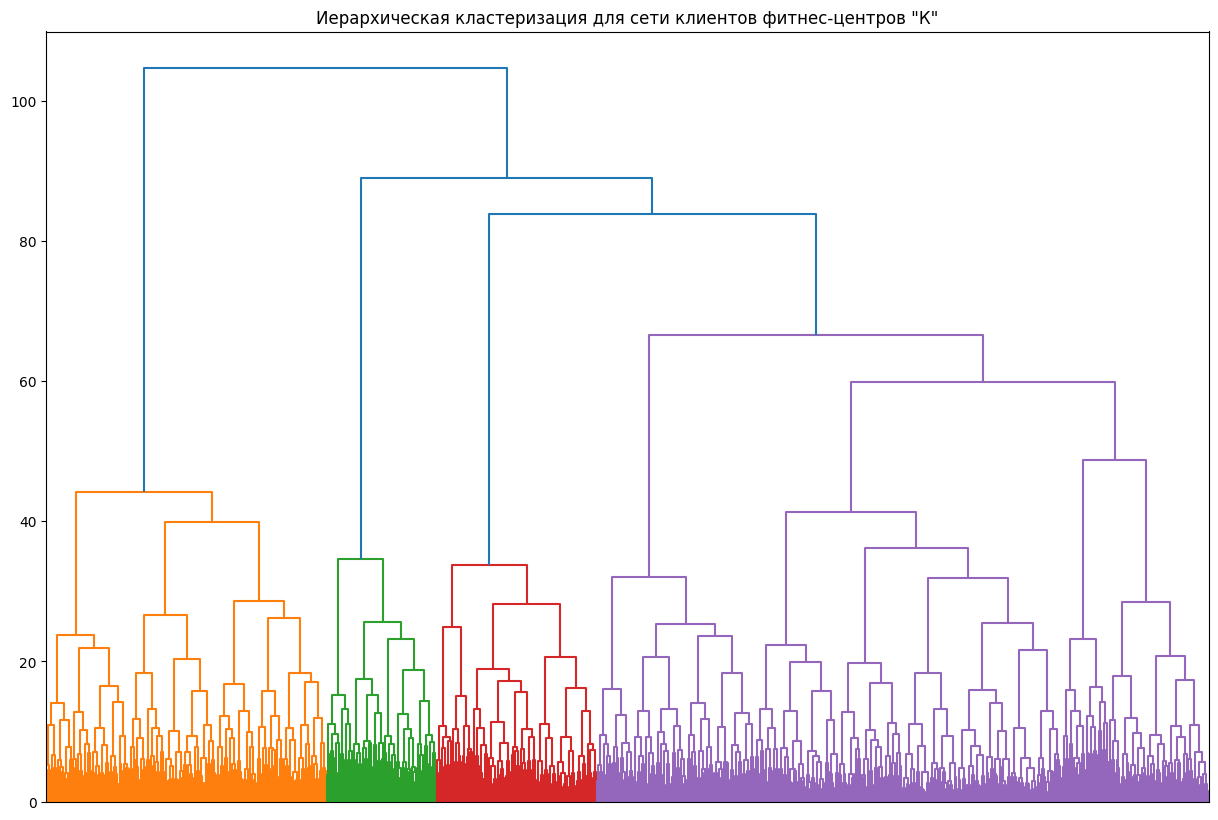

In [17]:
linked = linkage(x_sc, method = 'ward') 

plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.xticks(visible=False)
plt.title('Иерархическая кластеризация для сети клиентов фитнес-центров "К"');

*Комментарий.* Оптимальное **количество кластеров**, отражающих реальную структуру данных, - **5**.

Обоснование:
- структура дендрограммы - 5 крупных блоков с большими промежутками между ними;
- различия между группами (высокие арки);
- практические соображения (интерпретируемость, баланс детализации).

#### Кластеризация

- Зададим модель KMmeans с числом кластеров 5.
- Cпрогнозируем кластеры для наблюдений.
- Сохраним метки кластера в поле исходного датасета в 'cluster_churn' и выведем первые 5 строк таблицы.

In [18]:
km = KMeans(n_clusters=5, random_state=0)
labels = km.fit_predict(x_sc)
gym_churn['cluster_churn'] = labels
gym_churn.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn,cluster_churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0,1
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0,3
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0,3


*Комментарий.* Клиенты фитнес-клуба разделены на 5 кластеров, которые принимают значения от 0 до 4.

##### Средние значения признаков для кластеров

Определим характерный портрет клиента из каждого кластера. Для этого:
- Выведем статистику по средним значениям признаков для каждого кластера.
- Визуализируем распределение значений признаков по кластерам.

In [19]:
gym_churn_cluster_mean = gym_churn.groupby('cluster_churn').mean().reset_index()
gym_churn_cluster_mean

,cluster_churn,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,0,0.502970,0.959406,0.783168,0.574257,1.000000,10.889109,0.542574,29.982178,160.761016,9.954455,4.736634,1.982055,1.974789,0.027723
1,1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
2,2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
3,3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263
4,4,0.559666,0.976134,0.356802,0.230310,0.998807,2.669451,0.473747,30.125298,161.657905,2.459427,4.898568,2.852002,2.850161,0.068019


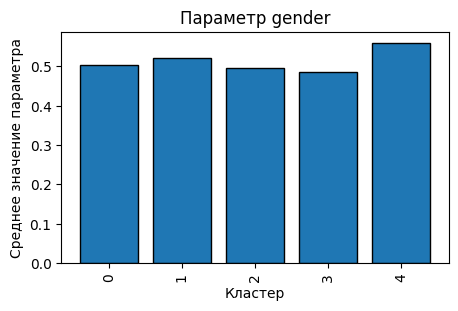

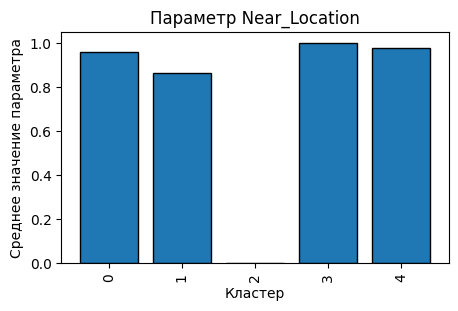

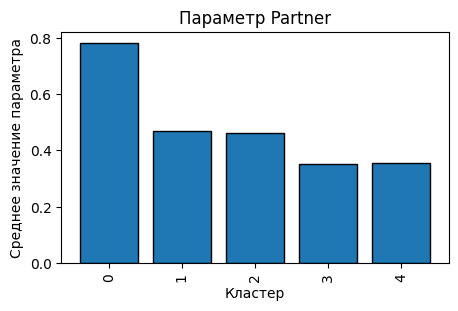

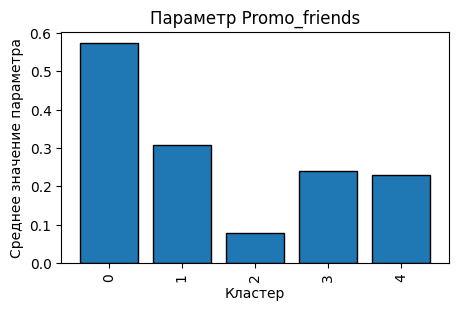

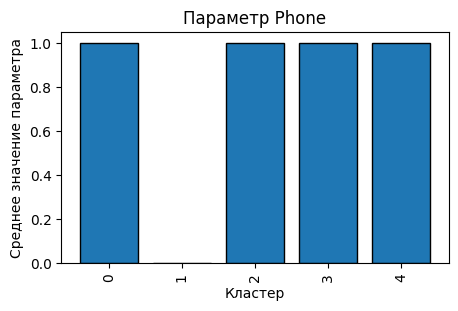

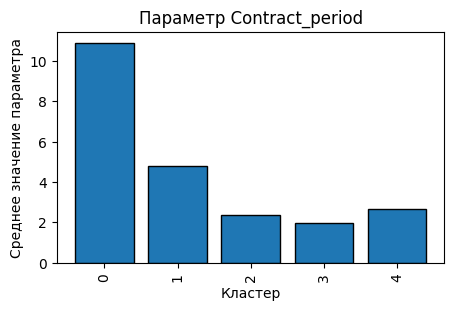

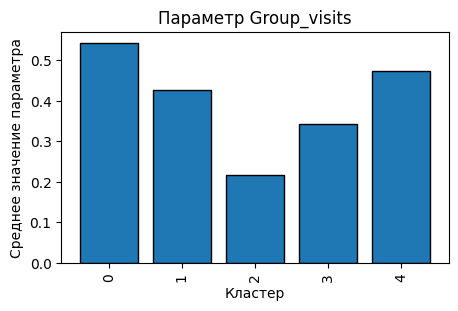

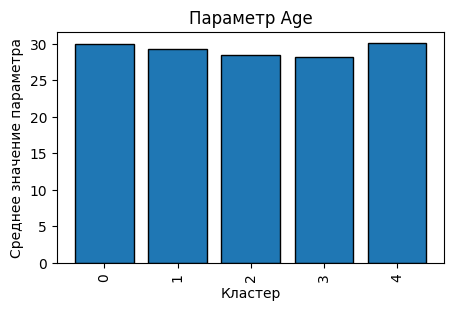

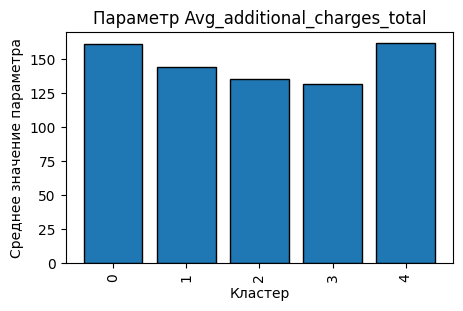

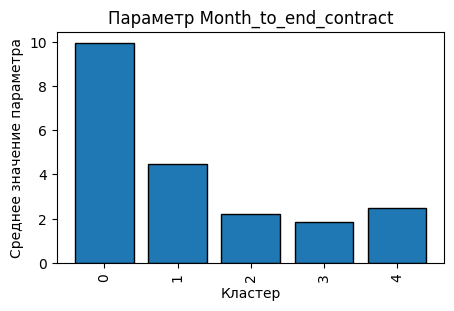

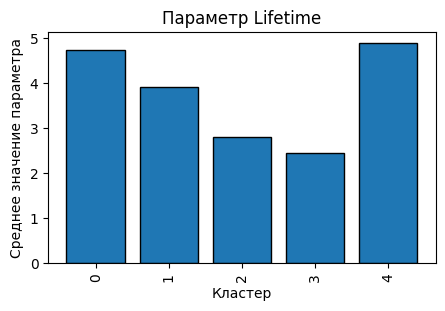

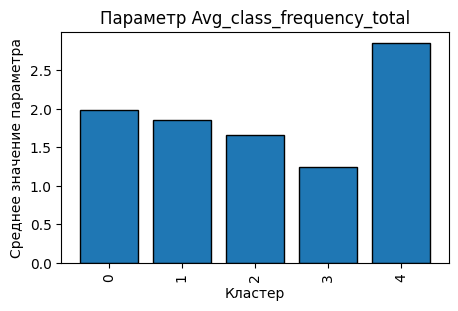

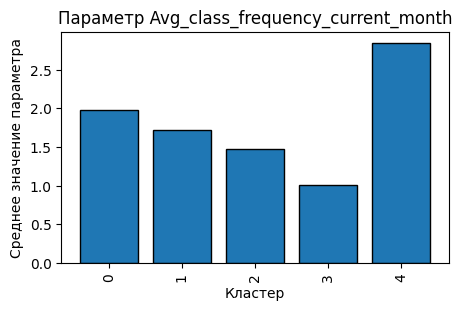

In [20]:
for col in gym_churn_cluster_mean.drop(['cluster_churn', 'Churn'], axis=1).columns:
    gym_churn_cluster_mean[col].plot(kind='bar', x='cluster_churn', width=0.8, edgecolor='black', figsize=(5,3))
    plt.title(f'Параметр {col}')
    plt.xlabel('Кластер')
    plt.ylabel('Среднее значение параметра')
    plt.show();

*Комментарий.* По средним оценкам:
- Параметры, имеющие близкие средние значения для всех кластеров: gender (50:50), Age (28-30), Avg_additional_charges_total (130-160), - они не являются критическими для определения оттока.
- **Кластер 0 ("партнерская поддержка")** представлен преимущественно клиентами-сотрудниками компании-партнера (80%), пришли по рекомендации друга (60%), обладатели годового абонемента (преимущественное большинство), для них характерен высокий лайфтайм (около 5 мес).
- **К кластеру 1 ("скрытные")** отнесены немногочисленные клиенты, для которых в анкете отсуствует номер телефона. Среди кластеров 2-4 также выделяется меньшим количеством абонементов на месяц, лайфтайм - около 4 мес.
- **К кластеру 2 ("неместные")** были отнесены все клиенты, живущие далеко от клуба, реже остальных посещают групповые занятия, пришли самостоятельно (не по приглашению друга), лайфтайм - около 3 мес.
- **К кластеру 3 ("новички")** были отнесены "новые" клиенты, реже остальных посещают клуб, предпочитающие абонемент на месяц, лайфтайм - около 2,5 мес.
- **К кластеру 4 ("завсегдатаи-одиночки")** были отнесены клиенты, значительно чаще остальных посещающие клуб, в основном обладатели месячных абонементов, редко посещают групповые занятия, лайфтайм - около 5 мес.

##### Распределения признаков для кластеров

Построим гистограммы частот признаков с разбиением на кластеры.

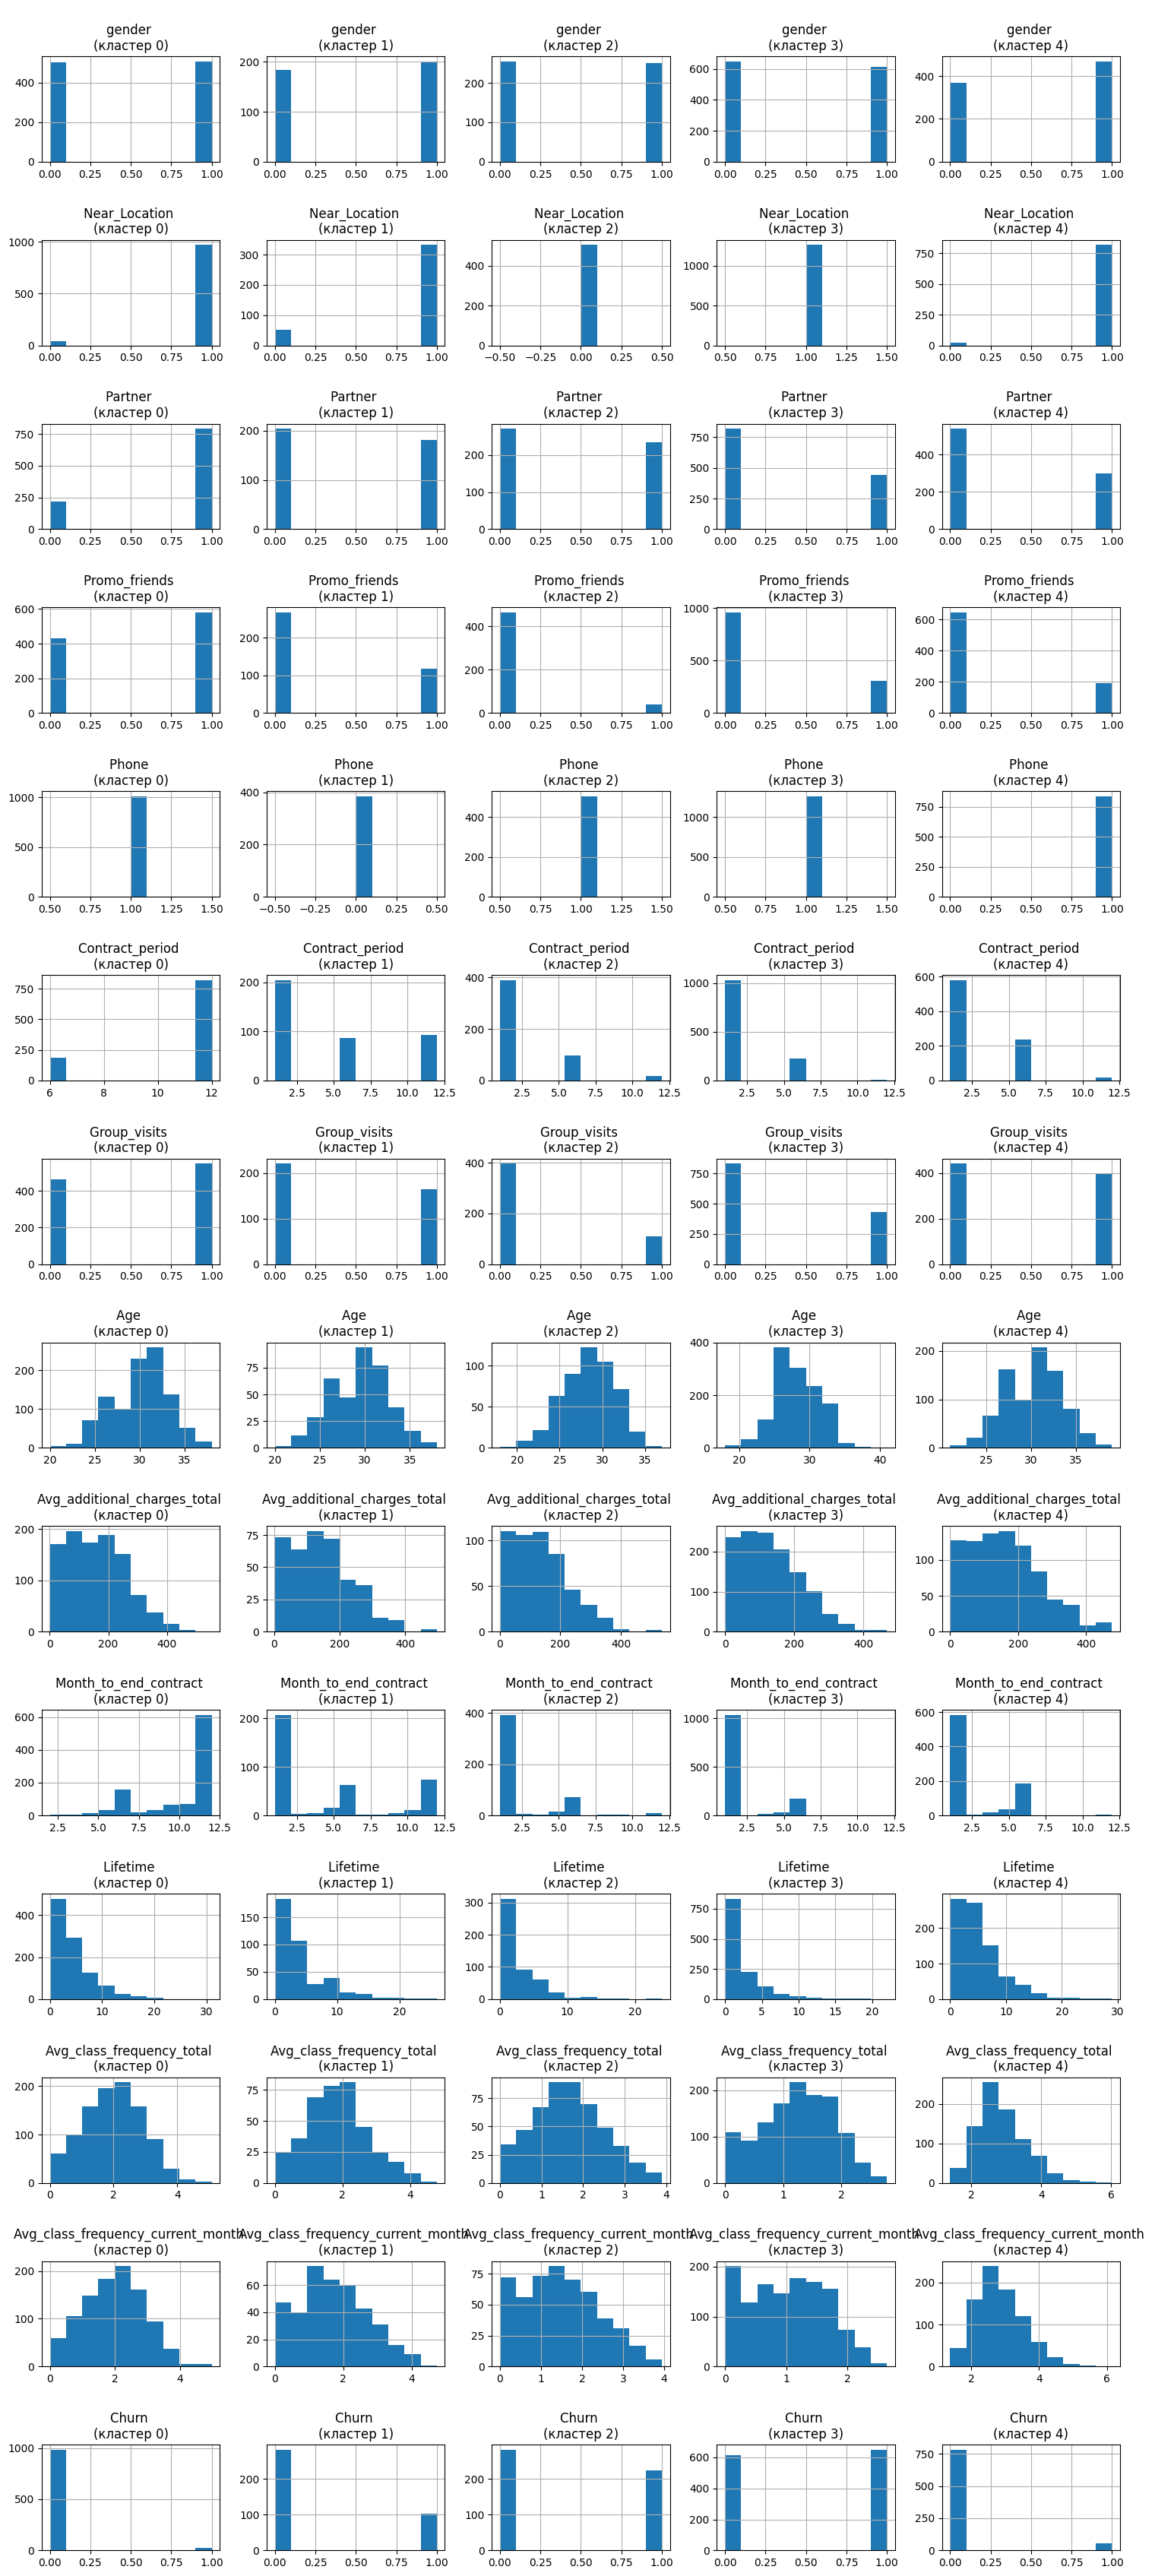

In [21]:
fig, axes = plt.subplots(ncols=5, nrows=len(gym_churn.drop('cluster_churn', axis=1).columns), figsize=(15, 34))

for i, col in enumerate(gym_churn.drop('cluster_churn', axis=1).columns):
    for j in range(5):
        gym_churn.query(f'cluster_churn == {j}')[col].hist(ax=axes[i][j])
        axes[i][j].set_title(f'\n{col} \n(кластер {j})')

plt.tight_layout();

*Комментарий.* Распределения признаков по кластерам поддверждают наблюдения, отмеченные при анализе средних значений (предыдущий шаг). Дополним:
- Дополнительные траты среди всех кластеров распределены схоже. По данному параметру нельзя судить о скором уходе клиента.
- Отток не характерен для клиентов кластеров 0 и 4, также сравнительно небольшой отток среди клиентов из кластера 1.
- В предыдущий оттоку месяц резко увеличивается число клиентов в кластерах 1-3 (наиболее заметно для кластера 2), посещавших клуб меньше 1 раза в неделю. Распределение количества посещений в неделю для этих кластеров смещается к 0 в предыдущем месяце. В том время как для кластеров 0 и 4 повторяет распределение посещений в общем. В кластере 3 распределение отличается от нормального в том числе и для общего количества посещений. Это объяснимо: клиенты новые и не задерживаются больше месяца.

##### Доля оттока клиентов по кластерам

Посмотрим конкретные цифры по оттоку клиентов для каждого кластера.

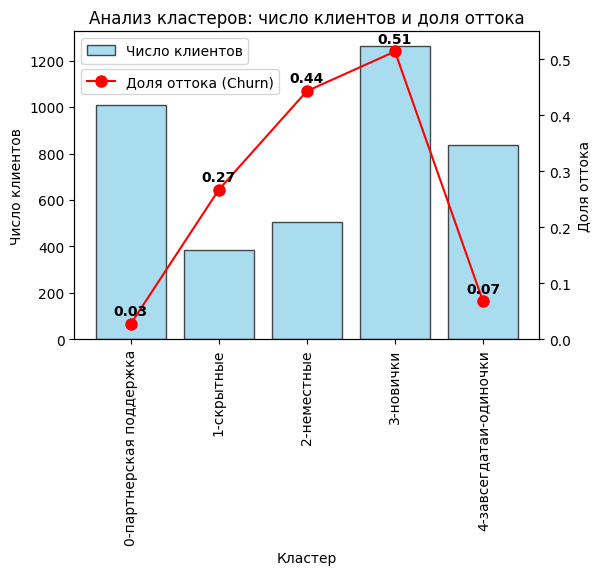

In [22]:
client_counts = gym_churn.groupby('cluster_churn')['Churn'].count()
churn_means = gym_churn.groupby('cluster_churn')['Churn'].mean()

fig, ax1 = plt.subplots(figsize=(6, 4))

# Столбчатая диаграмма для количества клиентов (ось Y слева)
bars = ax1.bar(client_counts.index, client_counts.values, 
               color='skyblue', alpha=0.7, edgecolor='black', label='Число клиентов')
ax1.set_ylabel('Число клиентов')

# Линейный график для оттока (ось Y справа)
ax2 = ax1.twinx()
line, = ax2.plot(churn_means.index, churn_means.values, 
                 marker='o', linestyle='-', color='red', 
                 label='Доля оттока (Churn)', markersize=8)
ax2.set_ylabel('Доля оттока')
ax2.set_ylim(0, 0.55)

for i, v in enumerate(churn_means.values):
    ax2.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom', color='black', fontweight='bold')


cluster_names = ['0-партнерская поддержка', '1-скрытные', '2-неместные', '3-новички', '4-завсегдатаи-одиночки']
ax1.set_xlabel('Кластер')
ax1.set_xticks(client_counts.index)
ax1.set_xticklabels(cluster_names, rotation=90)

ax1.legend(loc='upper left')
ax2.legend(loc='upper left', bbox_to_anchor=(0, 0.9))

plt.title('Анализ кластеров: число клиентов и доля оттока', fontsize=12);

*Комментарий.* Наибольшая доля оттока среди клиентов-новичков (кластер 3) и не местных (кластер 2), которые составляют два самых объемных кластера. Отток среди постоянных клиентов (кластеры 0 и 4) минимальный 3-7%.

#### Вывод

На основании проведённого анализа можно сделать вывод, что кластеризация клиентов фитнес-клуба позволила выделить пять различных групп, каждая из которых имеет свои уникальные характеристики и поведение.
- **«партнерская поддержка»:** клиенты, которые преимущественно являются сотрудниками компании-партнёра, пришли по рекомендации друга и имеют высокий лайфтайм. Отток для них минимален.
- **«скрытные»:** немногочисленные клиенты, у которых в анкете отсутствует номер телефона. Также характеризуются меньшим количеством абонементов на месяц и лайфтаймом около 4 месяцев.
- **«неместные»:** клиенты, живущие далеко от клуба, реже посещают групповые занятия и пришли самостоятельно. Лайфтайм составляет около 3 месяцев, и среди них наблюдается повышенный отток.
- **«новички»:** новые клиенты, реже посещающие клуб и предпочитающие абонемент на месяц. Лайфтайм около 2,5 месяцев, и этот кластер характеризуется наибольшим оттоком.
- **«завсегдатаи-одиночки»:** клиенты, значительно чаще посещающие клуб, в основном обладатели месячных абонементов, редко посещают групповые занятия. Лайфтайм около 5 месяцев, отток минимален.

<br>Параметры, такие как gender, Age и Avg_additional_charges_total, **не являются критическими** для определения оттока, так как имеют близкие средние значения для всех кластеров. Дополнительные траты также распределены схоже среди всех кластеров, что не позволяет использовать этот параметр для прогнозирования оттока.
<br>Наибольшая доля оттока наблюдается среди клиентов кластеров "неместные" (51 %) и "новички" (44 %) в то время как для кластеров "партнерская поддержка" (3 %) и "завсегдатаи-одиночки" (7 %) отток минимален.

### Выводы и рекомендации

**Выводы:**
1. Проведен анализ оттока клиентов фитнес-центра, направленный на разработку стратегии удержания: прогноза, портретов, рекомендаций. Для анализа представлены в полном объеме данные 4000 клиентов, оценка возможна по 13 параметрам.
2. По первым оценкам среднего и стандартного отклонения: примерно поровну разделились ответы (в анкетах) в столбцах gender и Partner; значения близки к среднему в столбцах: Near_location, Phone, Age; значительное разнообразие в значениях характерно для остальных столбцов. Коррелируют между собой 2 пары парметров: период абонемента и оставшиеся до его конца месяцы, среднее посещение в целом и в предыдущий месяц. Прослеживается средняя корреляция между клиентами - сотрудниками компании-партнера и теми, кого привел друг. С оттоком все параметры (кроме пола) имеют отрицательную корреляцию. Наибольшее влияние оказывает лайфтайм (-0,44). Так же со значением около -0,40 коррелируют частота посещений в предыдущий месяц, возраст, период абонемента и время до его окончания. Можно предположить, что от этих параметров и будет в первую очередь зависеть отток клиентов.
3. Для прогнозирования оттока клиентов на тестовой выборке (80 % всех данных) было обучено две модели: модель логистической регрессии и модель случайного леса. Обе модели продемонстировали высокие результаты доли правильных ответов (92%) точности (85, 84%) и полноты (83, 81%) на валидационной выборке (20 % всех данных). Однако модель логистической регрессии справляется лучше с обнаружением случаев оттока клиентов.
4. Кластеризация клиентов фитнес-клуба позволила выделить пять различных групп, каждая из которых имеет свои уникальные характеристики и поведение.
>- **«партнерская поддержка»:** клиенты, которые преимущественно являются сотрудниками компании-партнёра, пришли по рекомендации друга и имеют высокий лайфтайм. Отток для них минимален (3 %).
>- **«скрытные»:** немногочисленные клиенты, у которых в анкете отсутствует номер телефона. Также характеризуются меньшим количеством абонементов на месяц и лайфтаймом около 4 месяцев, средний отток (27 %).
>- **«неместные»:** клиенты, живущие далеко от клуба, реже посещают групповые занятия и пришли самостоятельно. Лайфтайм составляет около 3 месяцев, и среди них наблюдается повышенный отток (44 %).
>- **«новички»:** новые клиенты, реже посещающие клуб и предпочитающие абонемент на месяц. Лайфтайм около 2,5 месяцев, и этот кластер характеризуется наибольшим оттоком (51 %).
>- **«завсегдатаи-одиночки»:** клиенты, значительно чаще посещающие клуб, в основном обладатели месячных абонементов, редко посещают групповые занятия. Лайфтайм около 5 месяцев, отток минимален (7 %).

5. Параметры, такие как gender, Age и Avg_additional_charges_total, **не являются критическими** для определения оттока, так как имеют близкие средние значения для всех кластеров. Дополнительные траты также распределены схоже среди всех кластеров, что не позволяет использовать этот параметр для прогнозирования оттока.

**Рекомендации.** <br>
Различный отток для выделенных групп указывает на то, что стратегии удержания клиентов должны быть адаптированы под специфические характеристики каждого кластера.
- Среди групп "партнерская поддержка" и "завсегдатаи-одиночки" клиенты мотивированы посещать клуб и проблем с их удержанием не возникает. При этом разработка персональных предложений может привлечь больше клиентов группы "завсегдатаи-одиночки". Возможно, стоит подумать о привлечении новых компаний-партнеров для расширения группы "партнерская поддержка". 
- Для группы "неместных" - протестировать онлайн занятия как персональные, так и групповые.
- Для группы "новички" разработать адапционную программу с ознакомительными групповыми занятиями, занятиями с тренером, закрепить куратора-помощника на первые 1-2 месяца.
- Для всех групп:
>- Внедрение системы напоминаний о предстоящих тренировках.
>- Персонализация предложений на основе частоты посещений.
>- Разработка программы лояльности с учетом лайфтайма.
>- Регулярный сбор обратной связи за бонусы от добровольных клиентов, чтобы выявлять и устранять возможные проблемы.
>- Создание комьюнити, чтобы посещение фитнес-центров было чем-то большим, чем тренировка тела и силы воли.

**Подытожим.** <br>
Целевые группы клиентов:
>- Новички: клиенты, которые только начали посещать клуб и имеют короткий лайфтайм.
>- Неместные: клиенты, живущие далеко от клуба и реже посещающие групповые занятия.
>- Скрытные: клиенты без контактных данных в анкете.
>- Завсегдатаи-одиночки: клиенты с высоким лайфтаймом и частыми посещениями.
>- Партнёрская поддержка: клиенты — сотрудники компании-партнёра.

Ключевые факторы удержания:
>- Лайфтайм клиента (продолжительность сотрудничества).
>- Частота посещений (оптимально 2 раза в неделю).
>- Тип абонемента (предпочтение полугодовым).
>- Групповые занятия (активное участие снижает отток).
>- "Теплое" комьюнити (дополнительный стимул песещения, в т.ч. для тех, кто живет далеко)

Важно учитывать:
>- Возраст и пол не являются критическими факторами оттока.
>- Дополнительные траты распределены равномерно среди всех групп и также не являются определяющим фактором оттока.